In [5]:
import altair as alt

# saving data into a file rather than embedding into the chart
# alt.data_transformers.enable('json') 
# alt.data_transformers.enable('data_server')
alt.data_transformers.enable('default',max_rows=50000)
alt.renderers.enable('notebook',embed_options={'renderer': 'svg'})
# alt.renderers.enable('jupyterlab')
from vega_datasets import data
import pandas as pd
from altair import Scale,Color

In [65]:
file = 'annual_county_level.csv'

In [66]:
dforg = pd.read_csv(file,header=0)

In [67]:
dforg.head()

Unnamed: 0 state  fips  year    BUYER_COUNTY    pills  population  \
0           1    AK  2013  2006  ALEUTIANS EAST    300.0        2794   
1           2    AK  2013  2007  ALEUTIANS EAST    100.0        3012   
2           3    AK  2016  2006  ALEUTIANS WEST  26700.0        5658   
3           4    AK  2016  2007  ALEUTIANS WEST  33500.0        5466   
4           5    AK  2016  2008  ALEUTIANS WEST  30000.0        5393   

   Pill_per_pop  
0      0.107373  
1      0.033201  
2      4.718982  
3      6.128796  
4      5.562767

In [68]:
dforg.describe()

Unnamed: 0          fips          year         pills    population  \
count  20988.000000  20988.000000  20988.000000  2.098800e+04  2.098800e+04   
mean   10494.500000  30287.508529   2009.000000  3.646579e+06  1.010772e+05   
std     6058.858061  15118.266208      2.001572  9.739507e+06  3.153288e+05   
min        1.000000   1001.000000   2006.000000  2.000000e+01  4.890000e+02   
25%     5247.750000  18173.000000   2007.000000  3.506825e+05  1.285575e+04   
50%    10494.500000  29118.000000   2009.000000  1.080840e+06  2.769200e+04   
75%    15741.250000  45041.500000   2011.000000  3.076068e+06  7.005025e+04   
max    20988.000000  56045.000000   2012.000000  2.326166e+08  9.840024e+06   

       Pill_per_pop  
count  20988.000000  
mean      38.562225  
std       24.920452  
min        0.005968  
25%       22.587628  
50%       34.015286  
75%       48.676498  
max      501.605074

In [69]:
fdf = dforg[['fips','year','Pill_per_pop']]
fdf.to_csv('sample_data.csv',index=False)

In [70]:
fdf = dforg[['fips','year','Pill_per_pop','BUYER_COUNTY','state']]

In [71]:
fdf['Pill_per_pop'] = fdf["Pill_per_pop"].astype(int)
fdf['BUYER_COUNTY'] = fdf["BUYER_COUNTY"].astype(str)
fdf['state'] = fdf["state"].astype(str)
fdf.loc[fdf['Pill_per_pop']>150, ['Pill_per_pop']] = 150

C:\Users\Satya\Anaconda3\envs\dviz\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Satya\Anaconda3\envs\dviz\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Satya\Anaconda3\envs\dviz\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [72]:
dummy = 'nothing'

#The color scheme we use is yellowgreenblue

In [73]:
# import matplotlib
# from matplotlib import *
# # Mention the color scheme/map you are using currently
# cmap = cm.get_cmap('viridis_r', 15)
# cutoff = 0
# for i in range(cmap.N):
#     rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
#     print(matplotlib.colors.rgb2hex(rgb))
#     if i == cutoff:
#         dummy = matplotlib.colors.rgb2hex(rgb)

In [74]:
dummy = '#ECFAAC'
# dummy = '#E1EDAA'

In [75]:
def choropleth(data,level,year=2006,color=True,scheme='yellowgreenblue',dummy=dummy,stroke='black',strokeWidth=0.05,type='linear',fips='fips'):
    if color:
        chart = alt.Chart(level).mark_geoshape(
            stroke=stroke,
            strokeWidth=strokeWidth
        ).project(
            type='albersUsa'
        ).transform_lookup(
            lookup='id',
            from_=alt.LookupData(data, fips, ['year','Pill_per_pop','BUYER_COUNTY','state'])
        ).transform_calculate(
            Pill_per_pop='isValid(datum.Pill_per_pop) ? datum.Pill_per_pop : -1'  
        ).encode(
            color = alt.condition(
                'datum.Pill_per_pop > 0',
                alt.Color('Pill_per_pop:Q', scale=Scale(scheme=scheme,type=type)),
                alt.value(dummy)
                ),
            tooltip=['BUYER_COUNTY:N', 'state:N','Pill_per_pop:Q','year:Q']
        ).properties(
            width=700,
            height=400,
            title='Pills per person, {}'.format(year)
        )
    else:
        chart = alt.Chart(level).mark_geoshape(
            stroke=stroke,
            strokeWidth=strokeWidth
        ).project(
            type='albersUsa'
        ).transform_lookup(
            lookup='id',
            from_=alt.LookupData(data, fips, ['year','Pill_per_pop','BUYER_COUNTY','state'])
        ).transform_calculate(
            Pill_per_pop='isValid(datum.Pill_per_pop) ? datum.Pill_per_pop : -1'  
        ).encode(
            tooltip=['BUYER_COUNTY:N', 'state:N','Pill_per_pop:Q','year:Q']
        ).properties(
            width=700,
            height=400,
            title='Pills per person, {}'.format(year)
        )
        
    return chart

In [76]:
states = alt.topo_feature(data.us_10m.url, 'states')
counties = alt.topo_feature(data.us_10m.url+'#', 'counties')

In [77]:
def plot_year(year,fdf=fdf,counties=counties,states=states,state_stroke='black',state_strokew=0.3):
    fdf1 = fdf[fdf.year==year]
    chart = choropleth(fdf1,counties,year=year)
    
    outline = alt.Chart(states).mark_geoshape(stroke=state_stroke,strokeWidth=state_strokew).project(
    type='albersUsa'
    )
    
    chart1 = choropleth(fdf1,counties,color=False,year=year)
    
    return chart+outline+chart1

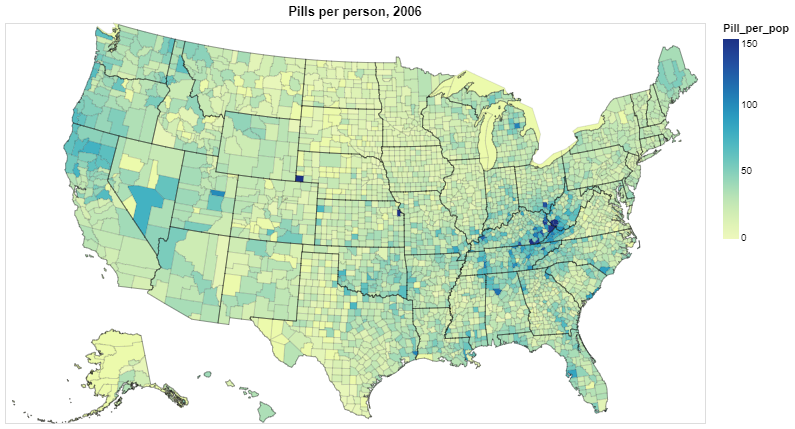

In [78]:
plot_year(2006)

In [79]:
chart = plot_year(2006)
chart.save('2006.png',scale_factor=2.0)

WebDriverException: Message: 'chromedriver' executable needs to be in PATH. Please see https://sites.google.com/a/chromium.org/chromedriver/home


In [ ]:
plot_year(2007)

In [ ]:
plot_year(2008)

In [ ]:
plot_year(2009)

In [ ]:
plot_year(2010)

In [ ]:
plot_year(2011)

In [ ]:
plot_year(2012)

In [ ]:
dummy='#dbe9f6'
scheme='blues'
type1='linear'

fg = alt.Chart(counties).mark_geoshape(
        stroke='black',
        strokeWidth=0.05
    ).project(
        type='albersUsa'
    ).transform_lookup(
        lookup='id',
        from_=alt.LookupData(fdf, 'fips', ['year','Pill_per_pop','BUYER_COUNTY', 'state'])
    ).transform_calculate(
        Pill_per_pop='isValid(datum.Pill_per_pop) ? datum.Pill_per_pop : -1'  
    ).encode(
        color = alt.condition(
            'datum.Pill_per_pop > 0',
            alt.Color('Pill_per_pop:Q', scale=Scale(scheme=scheme,type=type1)),
            alt.value(dummy)
            ),
        tooltip=['BUYER_COUNTY:N', 'state:N','Pill_per_pop:Q','year:Q']
    ).properties(
        width=700,
        height=400,
        title='Pills per person'
)

outline = alt.Chart(states).mark_geoshape(stroke='black',strokeWidth=0.2).project(
    type='albersUsa'
    )

fg1 = alt.Chart(counties).mark_geoshape(
        stroke='black',
        strokeWidth=0.05
    ).project(
        type='albersUsa'
    ).transform_lookup(
        lookup='id',
        from_=alt.LookupData(fdf, 'fips', ['year','Pill_per_pop','BUYER_COUNTY', 'state'])
    ).transform_calculate(
        Pill_per_pop='isValid(datum.Pill_per_pop) ? datum.Pill_per_pop : -1'  
    ).encode(
        tooltip=['BUYER_COUNTY:N', 'state:N','Pill_per_pop:Q','year:Q']
    ).properties(
        width=700,
        height=400,
        title='Pills per person'
)

fg+outline+fg1

In [ ]:
fdfn = fdf.pivot_table(index='fips',columns='year',values=['Pill_per_pop']).reset_index('fips')

In [ ]:
fdfn = fdfn.set_index('fips').join(fdf[['fips','BUYER_COUNTY','state']].set_index('fips'))

In [ ]:
fdfn.columns = [str(i[1]) if type(i)==tuple else i for i in fdfn.columns]

In [ ]:
fdfn.columns

In [ ]:
fdfn.head()

In [ ]:
fdfn = fdfn.reset_index()

In [80]:
# dummy='#dbe9f6'
# scheme='blues'
# type1='linear'

# fg = alt.Chart(counties).mark_geoshape(
#         stroke='black',
#         strokeWidth=0.05
#     ).project(
#         type='albersUsa'
#     ).transform_lookup(
#         lookup='id',
#         from_=alt.LookupData(fdfn, 'fips', ['year','Pill_per_pop','BUYER_COUNTY', 'state'])
#     ).transform_calculate(
#         Pill_per_pop='isValid(datum.Pill_per_pop) ? datum.Pill_per_pop : -1'  
#     ).encode(
#         color = alt.condition(
#             'datum.Pill_per_pop > 0',
#             alt.Color('Pill_per_pop:Q', scale=Scale(scheme=scheme,type=type1)),
#             alt.value(dummy)
#             ),
#         tooltip=['BUYER_COUNTY:N', 'state:N','Pill_per_pop:Q','year:Q']
#     ).properties(
#         width=700,
#         height=400,
#         title='Pills per person'
# )

# outline = alt.Chart(states).mark_geoshape(stroke='black',strokeWidth=0.2).project(
#     type='albersUsa'
#     )

# fg1 = alt.Chart(counties).mark_geoshape(
#         stroke='black',
#         strokeWidth=0.05
#     ).project(
#         type='albersUsa'
#     ).transform_lookup(
#         lookup='id',
#         from_=alt.LookupData(fdfn, 'fips', ['year','Pill_per_pop','BUYER_COUNTY', 'state'])
#     ).transform_fold(
#     columns, as_=['year', 'Pill_per_pop']
#     ).transform_calculate(
#         Pill_per_pop='isValid(datum.Pill_per_pop) ? datum.Pill_per_pop : -1'  
#     ).encode(
#         tooltip=['BUYER_COUNTY:N', 'state:N','Pill_per_pop:Q','year:Q']
#     ).properties(
#         width=700,
#         height=400,
#         title='Pills per person'
# )

# # fg+outline+fg1

In [81]:
dummy='#dbe9f6'
scheme='blues'
type1='linear'

slider = alt.binding_range(min=2006, max=2012, step=1)
select_year = alt.selection_single(name="key", fields=['key'],
                                   bind=slider, init={'key': 2006})

fg = alt.Chart(counties).mark_geoshape(
        stroke='black',
        strokeWidth=0.05
    ).project(
        type='albersUsa'
    ).transform_lookup(
        lookup='id',
        from_=alt.LookupData(fdfn, 'fips', [str(i) for i in range(2006,2013)]+['Pill_per_pop','BUYER_COUNTY', 'state'])
    ).transform_calculate(
        Pill_per_pop='isValid(datum.Pill_per_pop) ? datum.Pill_per_pop : -1'  
    ).transform_fold(
    [str(i) for i in range(2006,2013)],
    ).encode(
        color = alt.condition(
            'datum.Pill_per_pop > 0',
            alt.Color('Pill_per_pop:Q', scale=Scale(scheme=scheme,type=type1)),
            alt.value(dummy)
            ),
        tooltip=['BUYER_COUNTY:N', 'state:N','Pill_per_pop:Q','key:Q']
    ).add_selection(
    select_year
).properties(
    width=700,
    height=400
).transform_filter(
    select_year
)

NameError: name 'fdfn' is not defined

In [ ]:
fg

In [ ]:
fdfn = fdf.pivot_table(index='fips',columns='year',values=['Pill_per_pop']).reset_index('fips')
fdfn = fdfn.set_index('fips').join(fdf[['fips','BUYER_COUNTY','state']].set_index('fips'))

In [ ]:
fdfn = fdf.pivot_table(index='fips',columns='year',values=['Pill_per_pop']).reset_index('fips')

In [ ]:
fdfn

In [82]:
fdfn.columns = [str(i[1]) if type(i)==tuple else i for i in fdfn.columns]

NameError: name 'fdfn' is not defined

In [ ]:
fdfn.columns = ['fips' if i=='' else i for i in fdfn.columns ]

In [ ]:
fdfn.to_csv('sample_data_pivot.csv',index=False)

In [83]:
import altair as alt
import pandas as pd
from vega_datasets import data

fdf = pd.read_csv('https://raw.githubusercontent.com/sdasara95/Opioid-Crisis/master/sample_data.csv')
fdf['year'] = fdf['year'].astype(str)
fdf = fdf.pivot(index='fips', columns='year', values='Pill_per_pop').reset_index()
columns = [str(year) for year in range(2006, 2013)]

slider = alt.binding_range(min=2006, max=2012, step=1)
select_year = alt.selection_single(name="year", fields=['year'],
                                   bind=slider, init={'year': 2006})

a = alt.Chart(counties).mark_geoshape(
    stroke='black',
    strokeWidth=0.05
).project(
    type='albersUsa'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(fdf, 'fips', columns)
).transform_fold(
    columns, as_=['year', 'Pill_per_pop']
).transform_calculate(
    year='parseInt(datum.year)',
    Pill_per_pop='isValid(datum.Pill_per_pop) ? datum.Pill_per_pop : -1'  
).encode(
    color = alt.condition(
        'datum.Pill_per_pop > 0',
        alt.Color('Pill_per_pop:Q', scale=alt.Scale(scheme='blues')),
        alt.value('#dbe9f6')
    )).add_selection(
    select_year
).properties(
    width=700,
    height=400
).transform_filter(
    select_year
)

b = outline = alt.Chart(states).mark_geoshape(stroke='black',strokeWidth=0.2).project(
    type='albersUsa'
    )

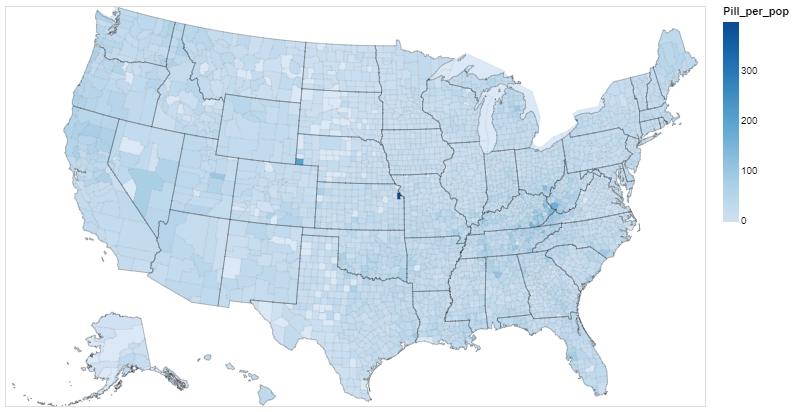

In [84]:
a+b

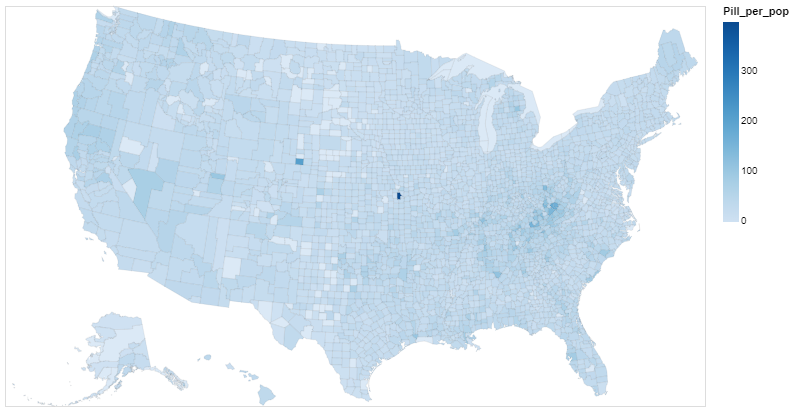

In [85]:
import altair as alt
import pandas as pd
from vega_datasets import data

us_counties = alt.topo_feature(data.us_10m.url, 'counties')
fdf = pd.read_csv('https://raw.githubusercontent.com/sdasara95/Opioid-Crisis/master/sample_data.csv')
fdf['year'] = fdf['year'].astype(str)
fdf = fdf.pivot(index='fips', columns='year', values='Pill_per_pop').reset_index()
columns = [str(year) for year in range(2006, 2013)]

slider = alt.binding_range(min=2006, max=2012, step=1)
select_year = alt.selection_single(name="year", fields=['year'],
                                   bind=slider, init={'year': 2006})

alt.Chart(us_counties).mark_geoshape(
    stroke='black',
    strokeWidth=0.05
).project(
    type='albersUsa'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(fdf, 'fips', columns)
).transform_fold(
    columns, as_=['year', 'Pill_per_pop']
).transform_calculate(
    year='parseInt(datum.year)',
    Pill_per_pop='isValid(datum.Pill_per_pop) ? datum.Pill_per_pop : -1'  
).encode(
    color = alt.condition(
        'datum.Pill_per_pop > 0',
        alt.Color('Pill_per_pop:Q', scale=alt.Scale(scheme='blues')),
        alt.value('#dbe9f6')
    )).add_selection(
    select_year
).properties(
    width=700,
    height=400
).transform_filter(
    select_year
)

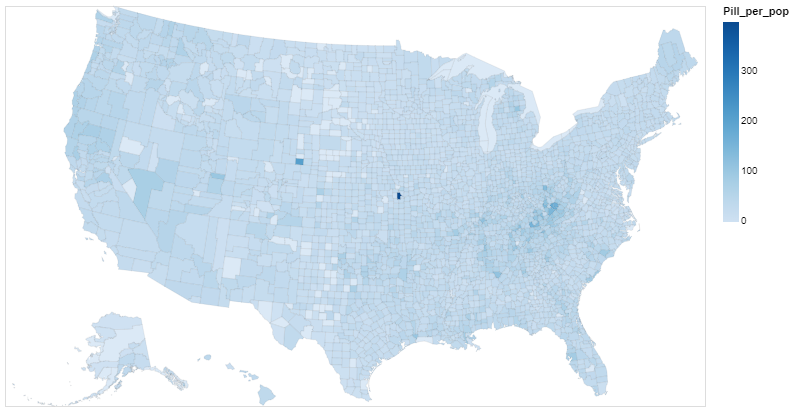

In [89]:
import altair as alt
import pandas as pd
from vega_datasets import data

us_counties = alt.topo_feature(data.us_10m.url, 'counties')
fdf = pd.read_csv('https://raw.githubusercontent.com/sdasara95/Opioid-Crisis/master/sample_data.csv')
fdf['year'] = fdf['year'].astype(str)
fdf = fdf.pivot(index='fips', columns='year', values='Pill_per_pop').reset_index()
columns = [str(year) for year in range(2006, 2013)]

slider = alt.binding_range(min=2006, max=2012, step=1)
select_year = alt.selection_single(name="year", fields=['year'],
                                   bind=slider, init={'year': 2006})

chart = alt.Chart(us_counties).mark_geoshape(
    stroke='black',
    strokeWidth=0.05
).project(
    type='albersUsa'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(fdf, 'fips', columns)
).transform_fold(
    columns, as_=['year', 'Pill_per_pop']
).transform_calculate(
    year='parseInt(datum.year)',
    Pill_per_pop='isValid(datum.Pill_per_pop) ? datum.Pill_per_pop : -1'  
).encode(
    color = alt.condition(
        'datum.Pill_per_pop > 0',
        alt.Color('Pill_per_pop:Q', scale=alt.Scale(scheme='blues')),
        alt.value('#dbe9f6')
    )).add_selection(
    select_year
).properties(
    width=700,
    height=400
).transform_filter(
    select_year
)

chart

In [87]:
chart.save('chart.html', embed_options={'renderer':'svg'})

# NOW WE WILL DEAL WITH DEATH DATA

In [2]:
import pandas as pd

In [3]:
dforg = pd.read_csv('dd.tsv',sep='\t')

In [4]:
dforg = dforg.reset_index()
dforg.drop(['index'],axis=1,inplace=True)

In [6]:
dforg.head()

Year  Year Code    State  State Code                County  County Code  \
0  2006       2006  Alabama           1  Jefferson County, AL         1073   
1  2006       2006  Arizona           4   Maricopa County, AZ         4013   
2  2006       2006  Arizona           4   Maricopa County, AZ         4013   
3  2006       2006  Arizona           4       Pima County, AZ         4019   
4  2006       2006  Arizona           4       Pima County, AZ         4019   

    Race Race Code  Gender Gender Code  Deaths  Population  Crude Rate  
0  White    2106-3  Female           F      10      191391  Unreliable  
1  White    2106-3  Female           F      53     1618323         3.3  
2  White    2106-3    Male           M      65     1604241         4.1  
3  White    2106-3  Female           F      13      425669  Unreliable  
4  White    2106-3    Male           M      20      408980         4.9

In [7]:
dforg['Year']=dforg['Year'].astype(str)

In [8]:
dforg['Deaths_per_100k'] = dforg['Deaths']*100000/dforg['Population']

In [9]:
dforg['Deaths_per_100k'] = dforg['Deaths_per_100k'].astype(int)

In [10]:
dforg.dtypes

Year               object
Year Code           int64
State              object
State Code          int64
County             object
County Code         int64
Race               object
Race Code          object
Gender             object
Gender Code        object
Deaths              int64
Population          int64
Crude Rate         object
Deaths_per_100k     int32
dtype: object

In [11]:
dforg.head()

Year  Year Code    State  State Code                County  County Code  \
0  2006       2006  Alabama           1  Jefferson County, AL         1073   
1  2006       2006  Arizona           4   Maricopa County, AZ         4013   
2  2006       2006  Arizona           4   Maricopa County, AZ         4013   
3  2006       2006  Arizona           4       Pima County, AZ         4019   
4  2006       2006  Arizona           4       Pima County, AZ         4019   

    Race Race Code  Gender Gender Code  Deaths  Population  Crude Rate  \
0  White    2106-3  Female           F      10      191391  Unreliable   
1  White    2106-3  Female           F      53     1618323         3.3   
2  White    2106-3    Male           M      65     1604241         4.1   
3  White    2106-3  Female           F      13      425669  Unreliable   
4  White    2106-3    Male           M      20      408980         4.9   

   Deaths_per_100k  
0                5  
1                3  
2                4  
3                3  
4                4

In [12]:
dforg['County'] = dforg['County'].apply(lambda x: x.split(',')[0])

In [13]:
reqcols = ['Year','County Code','Deaths_per_100k']
addcols = ['State','County']

In [14]:
fdf = dforg[reqcols]

In [15]:
fdf

Year  County Code  Deaths_per_100k
0     2006         1073                5
1     2006         4013                3
2     2006         4013                4
3     2006         4019                3
4     2006         4019                4
...    ...          ...              ...
1435  2012        55059               17
1436  2012        55079                8
1437  2012        55079                8
1438  2012        55079               10
1439  2012        55105               13

[1440 rows x 3 columns]

In [16]:
fdf = fdf.pivot_table(index='County Code',columns='Year',values='Deaths_per_100k').reset_index()

In [17]:
fdf.fillna(0,inplace=True)

In [18]:
fdf = pd.merge(fdf,dforg[addcols+['County Code']],on='County Code')

In [19]:
fdf

County Code  2006  2007  2008  2009  2010  2011       2012      State  \
0            1073   5.0   5.0   6.0   7.0   0.0  10.0   5.000000    Alabama   
1            1073   5.0   5.0   6.0   7.0   0.0  10.0   5.000000    Alabama   
2            1073   5.0   5.0   6.0   7.0   0.0  10.0   5.000000    Alabama   
3            1073   5.0   5.0   6.0   7.0   0.0  10.0   5.000000    Alabama   
4            1073   5.0   5.0   6.0   7.0   0.0  10.0   5.000000    Alabama   
...           ...   ...   ...   ...   ...   ...   ...        ...        ...   
1435        55079   8.5   6.5   7.5   7.0   9.0   8.5   8.666667  Wisconsin   
1436        55105   0.0   0.0   0.0   0.0   0.0   0.0  13.000000  Wisconsin   
1437        55133   0.0   0.0   0.0   0.0   5.5   6.0   0.000000  Wisconsin   
1438        55133   0.0   0.0   0.0   0.0   5.5   6.0   0.000000  Wisconsin   
1439        55133   0.0   0.0   0.0   0.0   5.5   6.0   0.000000  Wisconsin   

                County  
0     Jefferson County  
1     Jefferson County  
2     Jefferson County  
3     Jefferson County  
4     Jefferson County  
...                ...  
1435  Milwaukee County  
1436       Rock County  
1437   Waukesha County  
1438   Waukesha County  
1439   Waukesha County  

[1440 rows x 10 columns]

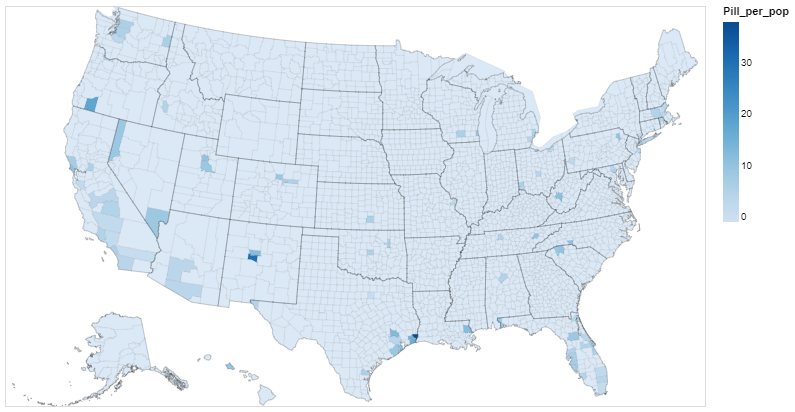

In [20]:
import altair as alt
from vega_datasets import data

us_states = alt.topo_feature(data.us_10m.url, 'states')
us_counties = alt.topo_feature(data.us_10m.url+'#', 'counties')

columns = [str(year) for year in range(2006, 2013)]

slider = alt.binding_range(min=2006, max=2012, step=1)
select_year = alt.selection_single(name="year", fields=['year'],
                                   bind=slider, init={'year': 2006})

chart = alt.Chart(us_counties).mark_geoshape(
    stroke='black',
    strokeWidth=0.05
).project(
    type='albersUsa'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(fdf, 'County Code', columns)
).transform_fold(
    columns, as_=['year', 'Deaths_per_100k']
).transform_calculate(
    year='parseInt(datum.year)',
    Pill_per_pop='isValid(datum.Deaths_per_100k) ? datum.Deaths_per_100k : -1'  
).encode(
    color = alt.condition(
        'datum.Deaths_per_100k > 0',
        alt.Color('Pill_per_pop:Q', scale=alt.Scale(scheme='blues')),
        alt.value('#dbe9f6')
    )).add_selection(
    select_year
).properties(
    width=700,
    height=400
).transform_filter(
    select_year
)

outline = alt.Chart(us_states).mark_geoshape(stroke='black',strokeWidth=0.15).project(
    type='albersUsa'
    )

chart2 = alt.Chart(us_counties).mark_geoshape(
    fillOpacity=0
).project(
    type='albersUsa'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(fdf, 'County Code', columns+addcols)
).transform_fold(
    columns, as_=['year', 'Deaths_per_100k']
).transform_calculate(
    year='parseInt(datum.year)',
    Pill_per_pop='isValid(datum.Deaths_per_100k) ? datum.Deaths_per_100k : -1'  
).encode(
    tooltip=['County:N', 'State:N','Deaths_per_100k:Q','year:Q']
    ).properties(
    width=700,
    height=400
)

chart+outline+chart2

In [21]:
new_df = fdf.melt(id_vars =['County Code','State','County'], value_vars =columns,var_name='year')
newdf1 = pd.merge(new_df,dforg[['Deaths','Population','County Code']],on='County Code')

In [22]:
dforg.columns

Index(['Year', 'Year Code', 'State', 'State Code', 'County', 'County Code',
       'Race', 'Race Code', 'Gender', 'Gender Code', 'Deaths', 'Population',
       'Crude Rate', 'Deaths_per_100k'],
      dtype='object')

In [23]:
newdf1.groupby(['year']).sum()

County Code          value  Deaths  Population
year                                                
2006    382383791   56822.166667  376221  6933101397
2007    382383791   75514.333333  376221  6933101397
2008    382383791   81793.166667  376221  6933101397
2009    382383791   85754.000000  376221  6933101397
2010    382383791  110114.166667  376221  6933101397
2011    382383791  114125.666667  376221  6933101397
2012    382383791  100103.333333  376221  6933101397

In [24]:
fdf.head()

County Code  2006  2007  2008  2009  2010  2011  2012    State  \
0         1073   5.0   5.0   6.0   7.0   0.0  10.0   5.0  Alabama   
1         1073   5.0   5.0   6.0   7.0   0.0  10.0   5.0  Alabama   
2         1073   5.0   5.0   6.0   7.0   0.0  10.0   5.0  Alabama   
3         1073   5.0   5.0   6.0   7.0   0.0  10.0   5.0  Alabama   
4         1073   5.0   5.0   6.0   7.0   0.0  10.0   5.0  Alabama   

             County  
0  Jefferson County  
1  Jefferson County  
2  Jefferson County  
3  Jefferson County  
4  Jefferson County

In [25]:
new_df = fdf.melt(id_vars =['County Code'], value_vars =columns,var_name='year').groupby(['County Code']).sum().reset_index()

In [35]:

fdf1 = pd.merge(fdf,dforg[['County Code','Deaths','Population']],on='County Code')
fdf1['value']=100000*fdf1['Deaths']/fdf1['Population']

In [36]:
fdf1.groupby(['County Code']).mean().reset_index()

County Code  2006  2007  2008  2009  2010  2011       2012     Deaths  \
0           1073   5.0   5.0   6.0   7.0   0.0  10.0   5.000000  12.714286   
1           2020   0.0   0.0  13.0  16.0   0.0  10.0   0.000000  14.333333   
2           4013   3.5   4.0   4.5   4.5   4.5   4.5   3.500000  76.357143   
3           4015   0.0   0.0   0.0  12.5  14.5  18.0  12.500000  14.125000   
4           4019   3.5   4.0   3.0   5.0   6.0   7.5  10.000000  26.230769   
..           ...   ...   ...   ...   ...   ...   ...        ...        ...   
251        55025   6.0   6.0   0.0   0.0   7.0  10.0   6.000000  16.000000   
252        55059   0.0  13.0   0.0  14.0   0.0   0.0  17.000000  11.333333   
253        55079   8.5   6.5   7.5   7.0   9.0   8.5   8.666667  23.500000   
254        55105   0.0   0.0   0.0   0.0   0.0   0.0  13.000000  10.000000   
255        55133   0.0   0.0   0.0   0.0   5.5   6.0   0.000000  11.666667   

       Population      value  
0    1.826771e+05   6.996233  
1    1.069003e+05  13.432774  
2    1.655795e+06   4.615770  
3    9.457025e+04  14.934903  
4    4.267906e+05   6.128539  
..            ...        ...  
251  2.118626e+05   7.540313  
252  7.421433e+04  15.269865  
253  2.759435e+05   8.503650  
254  7.534300e+04  13.272633  
255  1.842467e+05   6.324802  

[256 rows x 11 columns]

In [28]:
fdf1['value']=100000*fdf1['Deaths']/fdf1['Population']

In [29]:
new_df.columns

Index(['County Code', 'value'], dtype='object')

In [30]:
new_df=fdf1

In [37]:
new_df[new_df.value>30]=30

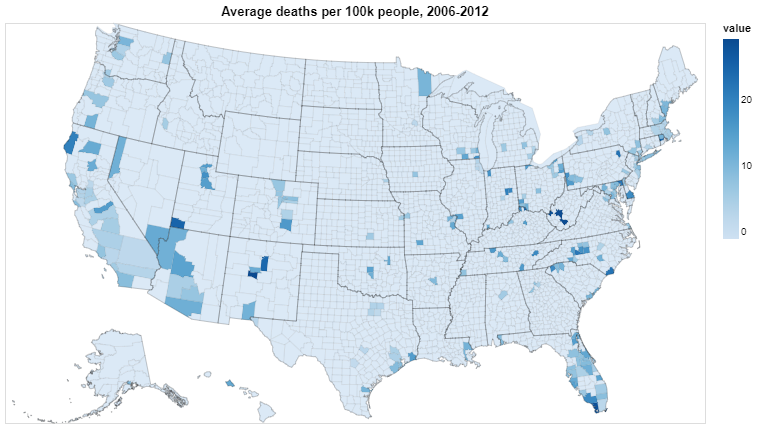

In [38]:
chart = alt.Chart(us_counties).mark_geoshape(
    stroke='black',
    strokeWidth=0.05
).project(
    type='albersUsa'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(new_df, 'County Code',['value'] )
).transform_calculate(
    value ='isValid(datum.value) ? datum.value : -1'  
).encode(
    color = alt.condition(
        'datum.value > 0',
        alt.Color('value:Q', scale=alt.Scale(scheme='blues')),
        alt.value('#dbe9f6')
    )).properties(
    width=700,
    height=400
)

outline = alt.Chart(us_states).mark_geoshape(stroke='black',strokeWidth=0.16).project(
    type='albersUsa'
    ).properties(title='Average deaths per 100k people, 2006-2012')

chart+outline

In [33]:
fdf.State.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'Tennessee', 'Texas', 'Utah',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin'],
      dtype=object)

In [34]:
regions = {}
regions['NorthEast'] = ['Connecticut', 'Delaware', 'Maine', 'Massachusetts', 'Maryland', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island','Vermont']
regions['SouthWest'] = ['Arizona', 'Colorado','New Mexico','Utah']
regions['SouthEast'] = ['South Carolina', 'Virginia', 'West Virginia', 'North Carolina', 'Mississippi', 'Arkansas', 'Tennessee', 'Florida', 'Georgia', 'Alabama', 'Kentucky','Louisiana']
regions['West'] = ['Alaska','Washington','Oregon','Colorado','California','Nevada','Arizona','New Mexico','Utah','Colorado','Wyoming','Idaho','Montana','Hawaii']
regions['MidWest'] = ['Ohio','Indiana','Illinois','Missouri','Michigan','Iowa','Wisconsin','Minnesota','North Dakota','South Dakota','Nebraska','Kansas']

In [558]:
fdf['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming'], dtype=object)

In [554]:
len(regions['West'])

14

In [548]:
lstates = list(regions.values())

In [551]:
new = []
for i in lstates:
    for j in i:
        if j not in new:
            new.append(j)
        else:
            print(j)
            

Arizona
New Mexico
Utah
Colorado


In [559]:
a = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
      'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming']

In [561]:
West = ['Alaska','Washington','Oregon','Colorado','California','Nevada','New Mexico','Utah','Colorado','Wyoming','Idaho','Montana','Hawaii']
len(West)

13

# Working on regions

In [638]:
regions = pd.read_csv('regions.tsv',sep='\t')

In [639]:
regions.columns

Index(['Census Region', 'Census Region Code', 'Census Division',
       'Census Division Code', 'State', 'State Code', 'County', 'County Code',
       'Deaths', 'Population', 'Crude Rate'],
      dtype='object')

In [640]:
regions.dtypes

Census Region           object
Census Region Code      object
Census Division         object
Census Division Code    object
State                   object
State Code               int64
County                  object
County Code              int64
Deaths                   int64
Population               int64
Crude Rate              object
dtype: object

In [641]:
'Census Region 1: Northeast'.split(':')[1][1:]

'Northeast'

In [642]:
regions.head()

Census Region Census Region Code          Census Division  \
NaN  Census Region 1: Northeast            CENS-R1  Division 1: New England   
NaN  Census Region 1: Northeast            CENS-R1  Division 1: New England   
NaN  Census Region 1: Northeast            CENS-R1  Division 1: New England   
NaN  Census Region 1: Northeast            CENS-R1  Division 1: New England   
NaN  Census Region 1: Northeast            CENS-R1  Division 1: New England   

    Census Division Code        State  State Code                 County  \
NaN              CENS-D1  Connecticut           9   Fairfield County, CT   
NaN              CENS-D1  Connecticut           9    Hartford County, CT   
NaN              CENS-D1  Connecticut           9  Litchfield County, CT   
NaN              CENS-D1  Connecticut           9   Middlesex County, CT   
NaN              CENS-D1  Connecticut           9   New Haven County, CT   

     County Code  Deaths  Population Crude Rate  
NaN         9001  127813    17345093      736.9  
NaN         9003  149795    16777368      892.8  
NaN         9005   32520     3544802      917.4  
NaN         9007   26698     3085908      865.2  
NaN         9009  145710    16150183      902.2

In [643]:
regions['Census Region']=regions['Census Region'].apply(lambda x:x.split(':')[1][1:])
regions['Census Division']=regions['Census Division'].apply(lambda x:x.split(':')[1][1:])
regions['County']=regions['County'].apply(lambda x:x.split(',')[0])
regions['fips']=regions['County Code']

In [644]:
regions.head()

Census Region Census Region Code Census Division Census Division Code  \
NaN     Northeast            CENS-R1     New England              CENS-D1   
NaN     Northeast            CENS-R1     New England              CENS-D1   
NaN     Northeast            CENS-R1     New England              CENS-D1   
NaN     Northeast            CENS-R1     New England              CENS-D1   
NaN     Northeast            CENS-R1     New England              CENS-D1   

           State  State Code             County  County Code  Deaths  \
NaN  Connecticut           9   Fairfield County         9001  127813   
NaN  Connecticut           9    Hartford County         9003  149795   
NaN  Connecticut           9  Litchfield County         9005   32520   
NaN  Connecticut           9   Middlesex County         9007   26698   
NaN  Connecticut           9   New Haven County         9009  145710   

     Population Crude Rate  fips  
NaN    17345093      736.9  9001  
NaN    16777368      892.8  9003  
NaN     3544802      917.4  9005  
NaN     3085908      865.2  9007  
NaN    16150183      902.2  9009

In [645]:
regions = regions[['Census Region','Census Division','State','County','fips']]

In [647]:
regions

Census Region Census Division        State              County   fips
NaN     Northeast     New England  Connecticut    Fairfield County   9001
NaN     Northeast     New England  Connecticut     Hartford County   9003
NaN     Northeast     New England  Connecticut   Litchfield County   9005
NaN     Northeast     New England  Connecticut    Middlesex County   9007
NaN     Northeast     New England  Connecticut    New Haven County   9009
..            ...             ...          ...                 ...    ...
NaN          West         Pacific   Washington    Wahkiakum County  53069
NaN          West         Pacific   Washington  Walla Walla County  53071
NaN          West         Pacific   Washington      Whatcom County  53073
NaN          West         Pacific   Washington      Whitman County  53075
NaN          West         Pacific   Washington       Yakima County  53077

[3147 rows x 5 columns]

In [651]:
regions.to_csv('regions.csv',index=False)

50

# Now Death Data

In [656]:
dforg = pd.read_csv('final_death.tsv',sep='\t')

In [657]:
dforg.head()

Year  Year Code    State  State Code                County  County Code  \
NaN  2006       2006  Alabama           1  Jefferson County, AL         1073   
NaN  2006       2006  Arizona           4   Maricopa County, AZ         4013   
NaN  2006       2006  Arizona           4   Maricopa County, AZ         4013   
NaN  2006       2006  Arizona           4       Pima County, AZ         4019   
NaN  2006       2006  Arizona           4       Pima County, AZ         4019   

      Race Race Code  Gender Gender Code  Deaths  Population  Crude Rate  
NaN  White    2106-3  Female           F      10      191391  Unreliable  
NaN  White    2106-3  Female           F      51     1618323         3.2  
NaN  White    2106-3    Male           M      63     1604241         3.9  
NaN  White    2106-3  Female           F      13      425669  Unreliable  
NaN  White    2106-3    Male           M      18      408980  Unreliable